In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adamax, Adam, SGD, Adagrad ,RMSprop

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_excel("/content/drive/MyDrive/Mini prj/Code/Rice_MSC_Dataset.xlsx")

In [4]:
df.head()
# 0: Basmati
# 1: Arborio
# 2: Jasmine
# 3: Ipsala
# 4: Karacadag

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,ALLdaub4L,ALLdaub4a,ALLdaub4b,ALLdaub4Y,ALLdaub4Cb,ALLdaub4Cr,ALLdaub4XX,ALLdaub4YY,ALLdaub4ZZ,CLASS
0,7805,437.915,209.8215,48.0221,0.9735,99.6877,0.9775,7985,0.3547,4.3693,...,113.9924,65.0610,59.5989,104.8552,67.8779,63.0828,0.3673,0.3793,0.4733,Basmati
1,7503,340.757,138.3361,69.8417,0.8632,97.7400,0.9660,7767,0.6637,1.9807,...,105.7055,64.3685,62.2084,96.8375,65.5371,63.5832,0.3014,0.3144,0.3641,Arborio
2,5124,314.617,141.9803,46.5784,0.9447,80.7718,0.9721,5271,0.4760,3.0482,...,109.7155,62.6423,58.7439,100.2352,68.9753,59.8342,0.3233,0.3445,0.4448,Jasmine
3,7990,437.085,201.4386,51.2245,0.9671,100.8622,0.9659,8272,0.6274,3.9325,...,116.5405,64.9069,60.2562,107.2560,67.3298,63.2237,0.3880,0.4020,0.4904,Basmati
4,7433,342.893,140.3350,68.3927,0.8732,97.2830,0.9831,7561,0.6006,2.0519,...,107.7502,64.7071,61.3549,98.8704,66.2048,63.5378,0.3184,0.3303,0.3928,Arborio


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Columns: 107 entries, AREA to CLASS
dtypes: float64(95), int64(11), object(1)
memory usage: 61.2+ MB


In [6]:
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
df['CLASS']= label_encoder.fit_transform(df['CLASS'])
#synth['CLASS']= label_encoder.fit_transform(synth['CLASS'])
 
df['CLASS'].unique()

array([1, 0, 3, 2, 4])

In [7]:
df = df.dropna()

In [8]:
#synth = synth.dropna()

In [9]:
X=df.drop(['CLASS'],axis=1)
y=df.CLASS

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
pca = PCA().fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [13]:
X_train.shape

(59993, 106)

Artificial Neural Networks

In [14]:
ANNmodel = tf.keras.models.Sequential([
      tf.keras.layers.Dense(units=100, input_shape=[106], activation="relu"),
      tf.keras.layers.Dense(units=5, activation = 'softmax')
])

In [15]:
# model = tf.keras.models.Sequential([
# #     tf.keras.layers.Dense(100, activation="relu")
#       tf.keras.layers.Dense(units=100, input_shape=[106], activation="relu"),
# #     tf.keras.layers.Dense(40, kernel_initializer = 'uniform', activation = 'relu'),
# #     tf.keras.layers.Dense(5, kernel_initializer = 'uniform', activation = 'relu'),
# #     tf.keras.layers.Dropout(0.2),
#       tf.keras.layers.Dense(units=5, activation = 'softmax')
# ])

In [16]:
ANNmodel.compile(optimizer=Adam(learning_rate=0.0001),
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

In [17]:
r1 = ANNmodel.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=16, epochs=20)

Epoch 1/20
3750/3750 [==============================] - 12s 2ms/step - loss: 0.1850 - accuracy: 0.9586 - val_loss: 0.0216 - val_accuracy: 0.9965
Epoch 2/20
3750/3750 [==============================] - 9s 2ms/step - loss: 0.0120 - accuracy: 0.9979 - val_loss: 0.0088 - val_accuracy: 0.9984
Epoch 3/20
3750/3750 [==============================] - 10s 3ms/step - loss: 0.0061 - accuracy: 0.9986 - val_loss: 0.0061 - val_accuracy: 0.9986
Epoch 4/20
3750/3750 [==============================] - 10s 3ms/step - loss: 0.0044 - accuracy: 0.9990 - val_loss: 0.0055 - val_accuracy: 0.9987
Epoch 5/20
3750/3750 [==============================] - 9s 2ms/step - loss: 0.0037 - accuracy: 0.9990 - val_loss: 0.0048 - val_accuracy: 0.9987
Epoch 6/20
3750/3750 [==============================] - 9s 2ms/step - loss: 0.0032 - accuracy: 0.9992 - val_loss: 0.0046 - val_accuracy: 0.9987
Epoch 7/20
3750/3750 [==============================] - 10s 3ms/step - loss: 0.0029 - accuracy: 0.9992 - val_loss: 0.0044 - val_accur

In [18]:
print('Loss:    ', r1.history['loss'][-1], '\nVal_loss: ', r1.history['val_loss'][-1])

Loss:     0.001361784408800304 
Val_loss:  0.003896568203344941


In [19]:
score_mse_test = ANNmodel.evaluate(X_test, y_test)
print('Test Score:', score_mse_test)


score_mse_train = ANNmodel.evaluate(X_train, y_train)
print('Train Score:', score_mse_train)

469/469 [==============================] - 1s 2ms/step - loss: 0.0039 - accuracy: 0.9992
Test Score: [0.0038965686690062284, 0.9991999268531799]
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0012 - accuracy: 0.9998
Train Score: [0.0011903645936399698, 0.9997666478157043]


In [20]:
#predictions = ANNmodel.predict(X_test)
predictions = np.argmax(ANNmodel.predict(X_test), axis=-1)

In [21]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, predictions))
print(metrics.classification_report(y_test, predictions))

[[3046    0    1    1    0]
 [   0 3048    0    2    0]
 [   0    0 3000    0    0]
 [   2    0    0 2912    0]
 [   6    0    0    0 2981]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3048
           1       1.00      1.00      1.00      3050
           2       1.00      1.00      1.00      3000
           3       1.00      1.00      1.00      2914
           4       1.00      1.00      1.00      2987

    accuracy                           1.00     14999
   macro avg       1.00      1.00      1.00     14999
weighted avg       1.00      1.00      1.00     14999



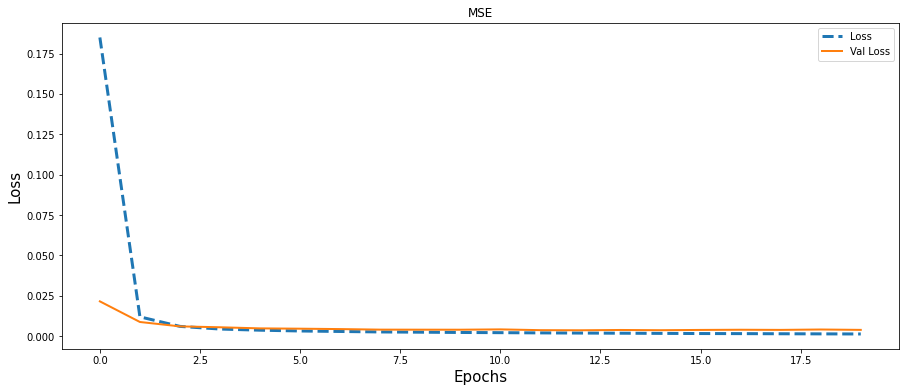

In [22]:
plt.figure(figsize=(15, 6))
plt.plot(r1.history['loss'], lw =3, ls = '--', label = 'Loss')
plt.plot(r1.history['val_loss'], lw =2, ls = '-', label = 'Val Loss')
plt.xlabel('Epochs', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.title('MSE')
plt.legend()

In [23]:
#ANNmodel.save('/content/drive/MyDrive/Mini prj/Code/ANN_model.h5')

Relu , SGD

In [24]:
ANNmodel2 = tf.keras.models.Sequential([
      tf.keras.layers.Dense(units=100, input_shape=[106], activation="relu"),
      tf.keras.layers.Dense(units=5, activation = 'softmax')
])

In [25]:
ANNmodel2.compile(optimizer=SGD(learning_rate=0.0001),
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

In [26]:
r2 = ANNmodel2.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=16, epochs=20)

Epoch 1/20
3750/3750 [==============================] - 9s 2ms/step - loss: 0.8869 - accuracy: 0.7171 - val_loss: 0.5014 - val_accuracy: 0.9263
Epoch 2/20
3750/3750 [==============================] - 9s 2ms/step - loss: 0.3738 - accuracy: 0.9539 - val_loss: 0.2919 - val_accuracy: 0.9657
Epoch 3/20
3750/3750 [==============================] - 9s 2ms/step - loss: 0.2419 - accuracy: 0.9720 - val_loss: 0.2086 - val_accuracy: 0.9748
Epoch 4/20
3750/3750 [==============================] - 10s 3ms/step - loss: 0.1817 - accuracy: 0.9779 - val_loss: 0.1647 - val_accuracy: 0.9785
Epoch 5/20
3750/3750 [==============================] - 9s 2ms/step - loss: 0.1475 - accuracy: 0.9807 - val_loss: 0.1378 - val_accuracy: 0.9804
Epoch 6/20
3750/3750 [==============================] - 10s 3ms/step - loss: 0.1255 - accuracy: 0.9825 - val_loss: 0.1195 - val_accuracy: 0.9818
Epoch 7/20
3750/3750 [==============================] - 10s 3ms/step - loss: 0.1100 - accuracy: 0.9839 - val_loss: 0.1063 - val_accura

In [27]:
print('Loss:    ', r2.history['loss'][-1], '\nVal_loss: ', r2.history['val_loss'][-1])

Loss:     0.048275671899318695 
Val_loss:  0.04977133125066757


In [28]:
score_mse_test = ANNmodel2.evaluate(X_test, y_test)
print('Test Score:', score_mse_test)


score_mse_train = ANNmodel2.evaluate(X_train, y_train)
print('Train Score:', score_mse_train)

469/469 [==============================] - 1s 2ms/step - loss: 0.0498 - accuracy: 0.9893
Test Score: [0.04977132007479668, 0.9892659783363342]
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0474 - accuracy: 0.9909
Train Score: [0.047364745289087296, 0.9908655881881714]


In [29]:
#predictions = ANNmodel.predict(X_test)
predictions = np.argmax(ANNmodel2.predict(X_test), axis=-1)

In [30]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, predictions))
print(metrics.classification_report(y_test, predictions))

[[3015    0    1   24    8]
 [   0 3001    0   49    0]
 [   1    0 2998    1    0]
 [  19   21    0 2873    1]
 [  31    0    0    5 2951]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3048
           1       0.99      0.98      0.99      3050
           2       1.00      1.00      1.00      3000
           3       0.97      0.99      0.98      2914
           4       1.00      0.99      0.99      2987

    accuracy                           0.99     14999
   macro avg       0.99      0.99      0.99     14999
weighted avg       0.99      0.99      0.99     14999



Relu, RMSprop

In [31]:
ANNmodel3 = tf.keras.models.Sequential([
      tf.keras.layers.Dense(units=100, input_shape=[106], activation="relu"),
      tf.keras.layers.Dense(units=5, activation = 'softmax')
])

In [32]:
ANNmodel3.compile(optimizer=RMSprop(learning_rate=0.0001),
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

In [33]:
r3 = ANNmodel3.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=16, epochs=50)

Epoch 1/50
3750/3750 [==============================] - 12s 3ms/step - loss: 0.1194 - accuracy: 0.9742 - val_loss: 0.0105 - val_accuracy: 0.9974
Epoch 2/50
3750/3750 [==============================] - 10s 3ms/step - loss: 0.0068 - accuracy: 0.9981 - val_loss: 0.0065 - val_accuracy: 0.9985
Epoch 3/50
3750/3750 [==============================] - 10s 3ms/step - loss: 0.0047 - accuracy: 0.9986 - val_loss: 0.0055 - val_accuracy: 0.9989
Epoch 4/50
3750/3750 [==============================] - 10s 3ms/step - loss: 0.0041 - accuracy: 0.9989 - val_loss: 0.0052 - val_accuracy: 0.9988
Epoch 5/50
3750/3750 [==============================] - 11s 3ms/step - loss: 0.0038 - accuracy: 0.9989 - val_loss: 0.0051 - val_accuracy: 0.9989
Epoch 6/50
3750/3750 [==============================] - 10s 3ms/step - loss: 0.0036 - accuracy: 0.9990 - val_loss: 0.0051 - val_accuracy: 0.9989
Epoch 7/50
3750/3750 [==============================] - 10s 3ms/step - loss: 0.0035 - accuracy: 0.9991 - val_loss: 0.0051 - val_ac

In [34]:
print('Loss:    ', r3.history['loss'][-1], '\nVal_loss: ', r3.history['val_loss'][-1])

Loss:     0.0027555774431675673 
Val_loss:  0.006827584933489561


In [35]:
score_mse_test = ANNmodel3.evaluate(X_test, y_test)
print('Test Score:', score_mse_test)


score_mse_train = ANNmodel3.evaluate(X_train, y_train)
print('Train Score:', score_mse_train)

469/469 [==============================] - 1s 2ms/step - loss: 0.0068 - accuracy: 0.9991
Test Score: [0.0068275886587798595, 0.9990665912628174]
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0025 - accuracy: 0.9995
Train Score: [0.002522226655855775, 0.9995166063308716]


In [36]:
#predictions = ANNmodel.predict(X_test)
predictions = np.argmax(ANNmodel3.predict(X_test), axis=-1)

In [37]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, predictions))
print(metrics.classification_report(y_test, predictions))

[[3044    0    0    4    0]
 [   0 3048    0    2    0]
 [   0    0 3000    0    0]
 [   2    0    0 2912    0]
 [   6    0    0    0 2981]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3048
           1       1.00      1.00      1.00      3050
           2       1.00      1.00      1.00      3000
           3       1.00      1.00      1.00      2914
           4       1.00      1.00      1.00      2987

    accuracy                           1.00     14999
   macro avg       1.00      1.00      1.00     14999
weighted avg       1.00      1.00      1.00     14999



In [38]:
# plt.figure(figsize=(15, 6))
# plt.plot(r.history['loss'], lw =3, ls = '--', label = 'Loss')
# plt.plot(r.history['val_loss'], lw =2, ls = '-', label = 'Val Loss')
# plt.xlabel('Epochs', fontsize=15)
# plt.ylabel('Loss', fontsize=15)
# plt.title('MSE')
# plt.legend()

tanh, Adam


In [39]:
#Activation: sigmoid, tanh, relu
#Optimizers: Adam, SGD ,RMSprop

In [40]:
ANNmodel4 = tf.keras.models.Sequential([
      tf.keras.layers.Dense(units=100, input_shape=[106], activation="tanh"),
      tf.keras.layers.Dense(units=5, activation = 'softmax')
])

In [41]:
ANNmodel4.compile(optimizer=Adam(learning_rate=0.0001),
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

In [42]:
r4 = ANNmodel4.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=16, epochs=50)

Epoch 1/50
3750/3750 [==============================] - 9s 2ms/step - loss: 0.1538 - accuracy: 0.9676 - val_loss: 0.0209 - val_accuracy: 0.9961
Epoch 2/50
3750/3750 [==============================] - 9s 2ms/step - loss: 0.0121 - accuracy: 0.9978 - val_loss: 0.0087 - val_accuracy: 0.9982
Epoch 3/50
3750/3750 [==============================] - 10s 3ms/step - loss: 0.0062 - accuracy: 0.9987 - val_loss: 0.0061 - val_accuracy: 0.9985
Epoch 4/50
3750/3750 [==============================] - 10s 3ms/step - loss: 0.0045 - accuracy: 0.9990 - val_loss: 0.0052 - val_accuracy: 0.9987
Epoch 5/50
3750/3750 [==============================] - 9s 2ms/step - loss: 0.0038 - accuracy: 0.9991 - val_loss: 0.0047 - val_accuracy: 0.9987
Epoch 6/50
3750/3750 [==============================] - 10s 3ms/step - loss: 0.0033 - accuracy: 0.9991 - val_loss: 0.0050 - val_accuracy: 0.9987
Epoch 7/50
3750/3750 [==============================] - 10s 3ms/step - loss: 0.0030 - accuracy: 0.9992 - val_loss: 0.0046 - val_accur

In [43]:
print('Loss:    ', r4.history['loss'][-1], '\nVal_loss: ', r4.history['val_loss'][-1])

Loss:     0.0005940049304626882 
Val_loss:  0.004594148136675358


In [44]:
score_mse_test = ANNmodel4.evaluate(X_test, y_test)
print('Test Score:', score_mse_test)


score_mse_train = ANNmodel4.evaluate(X_train, y_train)
print('Train Score:', score_mse_train)

469/469 [==============================] - 1s 2ms/step - loss: 0.0046 - accuracy: 0.9991
Test Score: [0.0045941490679979324, 0.9990665912628174]
1875/1875 [==============================] - 3s 2ms/step - loss: 5.1636e-04 - accuracy: 0.9999
Train Score: [0.0005163649329915643, 0.9998999834060669]


In [45]:
#predictions = ANNmodel.predict(X_test)
predictions = np.argmax(ANNmodel4.predict(X_test), axis=-1)

In [46]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, predictions))
print(metrics.classification_report(y_test, predictions))

[[3044    0    0    4    0]
 [   0 3049    0    1    0]
 [   0    0 3000    0    0]
 [   3    0    0 2911    0]
 [   6    0    0    0 2981]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3048
           1       1.00      1.00      1.00      3050
           2       1.00      1.00      1.00      3000
           3       1.00      1.00      1.00      2914
           4       1.00      1.00      1.00      2987

    accuracy                           1.00     14999
   macro avg       1.00      1.00      1.00     14999
weighted avg       1.00      1.00      1.00     14999



tanh , SGD

In [47]:
ANNmodel5 = tf.keras.models.Sequential([
      tf.keras.layers.Dense(units=100, input_shape=[106], activation="tanh"),
      tf.keras.layers.Dense(units=5, activation = 'softmax')
])

In [48]:
ANNmodel5.compile(optimizer=SGD(learning_rate=0.0001),
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

In [49]:
r5 = ANNmodel5.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=16, epochs=50)

Epoch 1/50
3750/3750 [==============================] - 9s 2ms/step - loss: 0.7579 - accuracy: 0.7775 - val_loss: 0.3876 - val_accuracy: 0.9341
Epoch 2/50
3750/3750 [==============================] - 9s 2ms/step - loss: 0.2904 - accuracy: 0.9579 - val_loss: 0.2273 - val_accuracy: 0.9708
Epoch 3/50
3750/3750 [==============================] - 9s 2ms/step - loss: 0.1908 - accuracy: 0.9789 - val_loss: 0.1665 - val_accuracy: 0.9809
Epoch 4/50
3750/3750 [==============================] - 9s 2ms/step - loss: 0.1466 - accuracy: 0.9839 - val_loss: 0.1346 - val_accuracy: 0.9835
Epoch 5/50
3750/3750 [==============================] - 9s 2ms/step - loss: 0.1215 - accuracy: 0.9858 - val_loss: 0.1149 - val_accuracy: 0.9850
Epoch 6/50
3750/3750 [==============================] - 9s 2ms/step - loss: 0.1052 - accuracy: 0.9870 - val_loss: 0.1013 - val_accuracy: 0.9860
Epoch 7/50
3750/3750 [==============================] - 10s 3ms/step - loss: 0.0936 - accuracy: 0.9879 - val_loss: 0.0913 - val_accuracy

In [50]:
print('Loss:    ', r5.history['loss'][-1], '\nVal_loss: ', r5.history['val_loss'][-1])

Loss:     0.024920573458075523 
Val_loss:  0.026553131639957428


In [51]:
score_mse_test = ANNmodel5.evaluate(X_test, y_test)
print('Test Score:', score_mse_test)


score_mse_train = ANNmodel5.evaluate(X_train, y_train)
print('Train Score:', score_mse_train)

469/469 [==============================] - 1s 2ms/step - loss: 0.0266 - accuracy: 0.9951
Test Score: [0.02655310556292534, 0.9950663447380066]
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0248 - accuracy: 0.9956
Train Score: [0.024755023419857025, 0.9955661296844482]


In [52]:
#predictions = ANNmodel.predict(X_test)
predictions = np.argmax(ANNmodel5.predict(X_test), axis=-1)

In [53]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, predictions))
print(metrics.classification_report(y_test, predictions))

[[3025    0    1   17    5]
 [   0 3030    0   20    0]
 [   0    0 3000    0    0]
 [   8    8    0 2898    0]
 [  14    0    0    1 2972]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3048
           1       1.00      0.99      1.00      3050
           2       1.00      1.00      1.00      3000
           3       0.99      0.99      0.99      2914
           4       1.00      0.99      1.00      2987

    accuracy                           1.00     14999
   macro avg       1.00      1.00      1.00     14999
weighted avg       1.00      1.00      1.00     14999



tanh , RMSprop

In [54]:
ANNmodel6 = tf.keras.models.Sequential([
      tf.keras.layers.Dense(units=100, input_shape=[106], activation="tanh"),
      tf.keras.layers.Dense(units=5, activation = 'softmax')
])

In [55]:
ANNmodel6.compile(optimizer=RMSprop(learning_rate=0.0001),
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

In [56]:
r6 = ANNmodel6.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=16, epochs=50)

Epoch 1/50
3750/3750 [==============================] - 11s 3ms/step - loss: 0.1728 - accuracy: 0.9499 - val_loss: 0.0112 - val_accuracy: 0.9972
Epoch 2/50
3750/3750 [==============================] - 10s 3ms/step - loss: 0.0075 - accuracy: 0.9981 - val_loss: 0.0067 - val_accuracy: 0.9982
Epoch 3/50
3750/3750 [==============================] - 10s 3ms/step - loss: 0.0051 - accuracy: 0.9986 - val_loss: 0.0056 - val_accuracy: 0.9985
Epoch 4/50
3750/3750 [==============================] - 11s 3ms/step - loss: 0.0044 - accuracy: 0.9988 - val_loss: 0.0049 - val_accuracy: 0.9987
Epoch 5/50
3750/3750 [==============================] - 10s 3ms/step - loss: 0.0039 - accuracy: 0.9989 - val_loss: 0.0047 - val_accuracy: 0.9989
Epoch 6/50
3750/3750 [==============================] - 10s 3ms/step - loss: 0.0038 - accuracy: 0.9989 - val_loss: 0.0047 - val_accuracy: 0.9989
Epoch 7/50
3750/3750 [==============================] - 10s 3ms/step - loss: 0.0037 - accuracy: 0.9989 - val_loss: 0.0049 - val_ac

In [57]:
print('Loss:    ', r6.history['loss'][-1], '\nVal_loss: ', r6.history['val_loss'][-1])

Loss:     0.0034581210929900408 
Val_loss:  0.006297121290117502


In [58]:
score_mse_test = ANNmodel6.evaluate(X_test, y_test)
print('Test Score:', score_mse_test)


score_mse_train = ANNmodel6.evaluate(X_train, y_train)
print('Train Score:', score_mse_train)

469/469 [==============================] - 1s 2ms/step - loss: 0.0063 - accuracy: 0.9991
Test Score: [0.006297127343714237, 0.9990665912628174]
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0036 - accuracy: 0.9994
Train Score: [0.003586319275200367, 0.9993999004364014]


In [59]:
#predictions = ANNmodel.predict(X_test)
predictions = np.argmax(ANNmodel6.predict(X_test), axis=-1)

In [60]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, predictions))
print(metrics.classification_report(y_test, predictions))

[[3044    0    0    4    0]
 [   0 3048    0    2    0]
 [   0    0 3000    0    0]
 [   1    1    0 2912    0]
 [   6    0    0    0 2981]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3048
           1       1.00      1.00      1.00      3050
           2       1.00      1.00      1.00      3000
           3       1.00      1.00      1.00      2914
           4       1.00      1.00      1.00      2987

    accuracy                           1.00     14999
   macro avg       1.00      1.00      1.00     14999
weighted avg       1.00      1.00      1.00     14999



sigmoid, Adam

In [61]:
ANNmodel7 = tf.keras.models.Sequential([
      tf.keras.layers.Dense(units=100, input_shape=[106], activation="sigmoid"),
      tf.keras.layers.Dense(units=5, activation = 'softmax')
])

In [62]:
ANNmodel7.compile(optimizer=Adam(learning_rate=0.0001),
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

In [63]:
r7 = ANNmodel7.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=16, epochs=50)

Epoch 1/50
3750/3750 [==============================] - 11s 3ms/step - loss: 0.3784 - accuracy: 0.9408 - val_loss: 0.0685 - val_accuracy: 0.9935
Epoch 2/50
3750/3750 [==============================] - 10s 3ms/step - loss: 0.0358 - accuracy: 0.9959 - val_loss: 0.0210 - val_accuracy: 0.9964
Epoch 3/50
3750/3750 [==============================] - 10s 3ms/step - loss: 0.0145 - accuracy: 0.9976 - val_loss: 0.0120 - val_accuracy: 0.9974
Epoch 4/50
3750/3750 [==============================] - 9s 2ms/step - loss: 0.0092 - accuracy: 0.9981 - val_loss: 0.0089 - val_accuracy: 0.9978
Epoch 5/50
3750/3750 [==============================] - 9s 2ms/step - loss: 0.0071 - accuracy: 0.9984 - val_loss: 0.0075 - val_accuracy: 0.9983
Epoch 6/50
3750/3750 [==============================] - 9s 2ms/step - loss: 0.0060 - accuracy: 0.9986 - val_loss: 0.0067 - val_accuracy: 0.9986
Epoch 7/50
3750/3750 [==============================] - 10s 3ms/step - loss: 0.0053 - accuracy: 0.9987 - val_loss: 0.0061 - val_accur

In [64]:
print('Loss:    ', r7.history['loss'][-1], '\nVal_loss: ', r7.history['val_loss'][-1])

Loss:     0.0016813997644931078 
Val_loss:  0.0045829834416508675


In [65]:
score_mse_test = ANNmodel7.evaluate(X_test, y_test)
print('Test Score:', score_mse_test)


score_mse_train = ANNmodel7.evaluate(X_train, y_train)
print('Train Score:', score_mse_train)

469/469 [==============================] - 1s 2ms/step - loss: 0.0046 - accuracy: 0.9991
Test Score: [0.004582982510328293, 0.999133288860321]
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0017 - accuracy: 0.9995
Train Score: [0.0016648767050355673, 0.999466598033905]


In [66]:
#predictions = ANNmodel.predict(X_test)
predictions = np.argmax(ANNmodel7.predict(X_test), axis=-1)

In [67]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, predictions))
print(metrics.classification_report(y_test, predictions))

[[3047    0    0    1    0]
 [   0 3048    0    2    0]
 [   0    0 3000    0    0]
 [   3    1    0 2910    0]
 [   6    0    0    0 2981]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3048
           1       1.00      1.00      1.00      3050
           2       1.00      1.00      1.00      3000
           3       1.00      1.00      1.00      2914
           4       1.00      1.00      1.00      2987

    accuracy                           1.00     14999
   macro avg       1.00      1.00      1.00     14999
weighted avg       1.00      1.00      1.00     14999



sigmoid, SGD

In [68]:
ANNmodel8 = tf.keras.models.Sequential([
      tf.keras.layers.Dense(units=100, input_shape=[106], activation="sigmoid"),
      tf.keras.layers.Dense(units=5, activation = 'softmax')
])

In [69]:
ANNmodel8.compile(optimizer=SGD(learning_rate=0.0001),
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

In [70]:
r8 = ANNmodel8.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=16, epochs=50)

Epoch 1/50
3750/3750 [==============================] - 10s 3ms/step - loss: 1.4889 - accuracy: 0.3678 - val_loss: 1.2046 - val_accuracy: 0.5876
Epoch 2/50
3750/3750 [==============================] - 10s 3ms/step - loss: 1.0713 - accuracy: 0.7415 - val_loss: 0.9601 - val_accuracy: 0.8679
Epoch 3/50
3750/3750 [==============================] - 10s 3ms/step - loss: 0.8754 - accuracy: 0.9046 - val_loss: 0.7991 - val_accuracy: 0.9299
Epoch 4/50
3750/3750 [==============================] - 9s 2ms/step - loss: 0.7373 - accuracy: 0.9417 - val_loss: 0.6809 - val_accuracy: 0.9503
Epoch 5/50
3750/3750 [==============================] - 9s 2ms/step - loss: 0.6337 - accuracy: 0.9576 - val_loss: 0.5905 - val_accuracy: 0.9630
Epoch 6/50
3750/3750 [==============================] - 9s 2ms/step - loss: 0.5534 - accuracy: 0.9668 - val_loss: 0.5198 - val_accuracy: 0.9696
Epoch 7/50
3750/3750 [==============================] - 10s 3ms/step - loss: 0.4898 - accuracy: 0.9719 - val_loss: 0.4632 - val_accur

In [71]:
print('Loss:    ', r8.history['loss'][-1], '\nVal_loss: ', r8.history['val_loss'][-1])

Loss:     0.08919759094715118 
Val_loss:  0.09079691767692566


In [72]:
score_mse_test = ANNmodel8.evaluate(X_test, y_test)
print('Test Score:', score_mse_test)


score_mse_train = ANNmodel8.evaluate(X_train, y_train)
print('Train Score:', score_mse_train)

469/469 [==============================] - 1s 2ms/step - loss: 0.0908 - accuracy: 0.9855
Test Score: [0.09079694747924805, 0.9855323433876038]
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0885 - accuracy: 0.9874
Train Score: [0.08850035071372986, 0.9874318838119507]


In [73]:
#predictions = ANNmodel.predict(X_test)
predictions = np.argmax(ANNmodel8.predict(X_test), axis=-1)

In [74]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, predictions))
print(metrics.classification_report(y_test, predictions))

[[3005    0    0   39    4]
 [   0 2972    0   78    0]
 [   0    0 3000    0    0]
 [  21   37    0 2855    1]
 [  31    0    0    6 2950]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      3048
           1       0.99      0.97      0.98      3050
           2       1.00      1.00      1.00      3000
           3       0.96      0.98      0.97      2914
           4       1.00      0.99      0.99      2987

    accuracy                           0.99     14999
   macro avg       0.99      0.99      0.99     14999
weighted avg       0.99      0.99      0.99     14999



sigmoid, RMSprop

In [75]:
ANNmodel9 = tf.keras.models.Sequential([
      tf.keras.layers.Dense(units=100, input_shape=[106], activation="sigmoid"),
      tf.keras.layers.Dense(units=5, activation = 'softmax')
])

In [76]:
ANNmodel9.compile(optimizer=RMSprop(learning_rate=0.0001),
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

In [77]:
r9 =ANNmodel9.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=16, epochs=50)

Epoch 1/50
3750/3750 [==============================] - 10s 3ms/step - loss: 0.3294 - accuracy: 0.9449 - val_loss: 0.0337 - val_accuracy: 0.9945
Epoch 2/50
3750/3750 [==============================] - 10s 3ms/step - loss: 0.0194 - accuracy: 0.9962 - val_loss: 0.0142 - val_accuracy: 0.9965
Epoch 3/50
3750/3750 [==============================] - 11s 3ms/step - loss: 0.0106 - accuracy: 0.9976 - val_loss: 0.0100 - val_accuracy: 0.9973
Epoch 4/50
3750/3750 [==============================] - 11s 3ms/step - loss: 0.0078 - accuracy: 0.9979 - val_loss: 0.0081 - val_accuracy: 0.9977
Epoch 5/50
3750/3750 [==============================] - 10s 3ms/step - loss: 0.0064 - accuracy: 0.9981 - val_loss: 0.0071 - val_accuracy: 0.9980
Epoch 6/50
3750/3750 [==============================] - 10s 3ms/step - loss: 0.0056 - accuracy: 0.9982 - val_loss: 0.0064 - val_accuracy: 0.9983
Epoch 7/50
3750/3750 [==============================] - 10s 3ms/step - loss: 0.0051 - accuracy: 0.9984 - val_loss: 0.0062 - val_ac

In [78]:
print('Loss:    ', r9.history['loss'][-1], '\nVal_loss: ', r9.history['val_loss'][-1])

Loss:     0.003403446637094021 
Val_loss:  0.005455137230455875


In [79]:
score_mse_test = ANNmodel9.evaluate(X_test, y_test)
print('Test Score:', score_mse_test)


score_mse_train = ANNmodel9.evaluate(X_train, y_train)
print('Train Score:', score_mse_train)

469/469 [==============================] - 1s 2ms/step - loss: 0.0055 - accuracy: 0.9989
Test Score: [0.0054551479406654835, 0.9989332556724548]
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0033 - accuracy: 0.9992
Train Score: [0.003314553527161479, 0.9992499351501465]


In [80]:
#predictions = ANNmodel.predict(X_test)
predictions = np.argmax(ANNmodel9.predict(X_test), axis=-1)

In [81]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, predictions))
print(metrics.classification_report(y_test, predictions))

[[3044    0    0    4    0]
 [   0 3048    0    2    0]
 [   0    0 3000    0    0]
 [   1    2    0 2911    0]
 [   7    0    0    0 2980]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3048
           1       1.00      1.00      1.00      3050
           2       1.00      1.00      1.00      3000
           3       1.00      1.00      1.00      2914
           4       1.00      1.00      1.00      2987

    accuracy                           1.00     14999
   macro avg       1.00      1.00      1.00     14999
weighted avg       1.00      1.00      1.00     14999



In [82]:
# from sklearn.model_selection import cross_val_score
# print(cross_val_score(model, X, y, cv=10, scoring="r2").mean())

Deep Neural Network

relu, Adam

In [83]:
modelDNN10 = tf.keras.models.Sequential([
      tf.keras.layers.Dense(units=100, input_shape=[106], activation="relu"),
      tf.keras.layers.Dense(50, activation='relu'),
      tf.keras.layers.Dense(50, activation='relu'),
      tf.keras.layers.Dense(units=5, activation = 'softmax')
])

In [84]:
modelDNN10.compile(optimizer=Adam(learning_rate=0.002),
loss=['sparse_categorical_crossentropy'],
metrics=['accuracy'])

In [85]:
rDNN10 = modelDNN10.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=1, epochs=20)

Epoch 1/20
59993/59993 [==============================] - 143s 2ms/step - loss: 0.0310 - accuracy: 0.9940 - val_loss: 0.0477 - val_accuracy: 0.9971
Epoch 2/20
59993/59993 [==============================] - 138s 2ms/step - loss: 0.0334 - accuracy: 0.9975 - val_loss: 0.0175 - val_accuracy: 0.9984
Epoch 3/20
59993/59993 [==============================] - 139s 2ms/step - loss: 0.0225 - accuracy: 0.9978 - val_loss: 0.0813 - val_accuracy: 0.9968
Epoch 4/20
59993/59993 [==============================] - 140s 2ms/step - loss: 0.0261 - accuracy: 0.9979 - val_loss: 0.0348 - val_accuracy: 0.9981
Epoch 5/20
59993/59993 [==============================] - 139s 2ms/step - loss: 0.0226 - accuracy: 0.9981 - val_loss: 0.0417 - val_accuracy: 0.9988
Epoch 6/20
59993/59993 [==============================] - 140s 2ms/step - loss: 0.0207 - accuracy: 0.9983 - val_loss: 0.0449 - val_accuracy: 0.9969
Epoch 7/20
59993/59993 [==============================] - 141s 2ms/step - loss: 0.0213 - accuracy: 0.9983 - val_

In [86]:
print('Loss:    ', rDNN10.history['loss'][-1], '\nVal_loss: ', rDNN10.history['val_loss'][-1])

Loss:     0.027151353657245636 
Val_loss:  0.0709252804517746


In [87]:
score_mse_test = modelDNN10.evaluate(X_test, y_test)
print('Test Score:', score_mse_test)


score_mse_train = modelDNN10.evaluate(X_train, y_train)
print('Train Score:', score_mse_train)

469/469 [==============================] - 1s 2ms/step - loss: 0.0709 - accuracy: 0.9989
Test Score: [0.07092532515525818, 0.9989332556724548]
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0054 - accuracy: 0.9994
Train Score: [0.005439203232526779, 0.9993665814399719]


In [88]:
#predictions = ANNmodel.predict(X_test)
predictions = np.argmax(modelDNN10.predict(X_test), axis=-1)

In [89]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, predictions))
print(metrics.classification_report(y_test, predictions))

[[3044    0    0    4    0]
 [   0 3047    0    3    0]
 [   0    0 3000    0    0]
 [   1    0    0 2913    0]
 [   7    0    0    1 2979]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3048
           1       1.00      1.00      1.00      3050
           2       1.00      1.00      1.00      3000
           3       1.00      1.00      1.00      2914
           4       1.00      1.00      1.00      2987

    accuracy                           1.00     14999
   macro avg       1.00      1.00      1.00     14999
weighted avg       1.00      1.00      1.00     14999



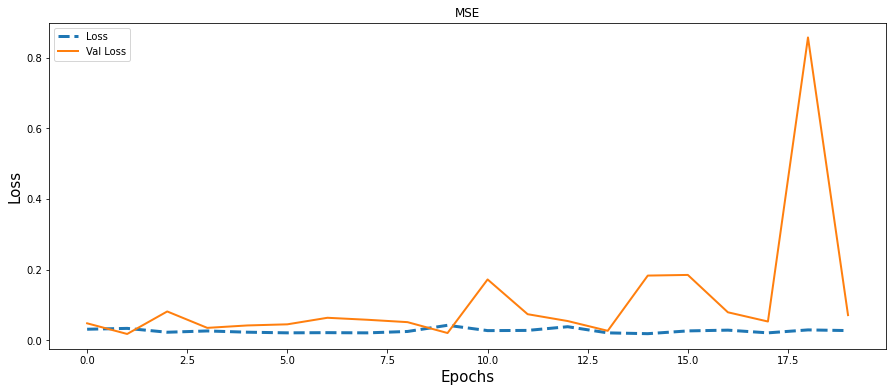

In [90]:
plt.figure(figsize=(15, 6))
plt.plot(rDNN10.history['loss'], lw =3, ls = '--', label = 'Loss')
plt.plot(rDNN10.history['val_loss'], lw =2, ls = '-', label = 'Val Loss')
plt.xlabel('Epochs', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.title('MSE')
plt.legend()

In [91]:
from keras.models import load_model
modelDNN10.save('/content/drive/MyDrive/Mini prj/Code/DNN_model.h5')  

relu, SGD

In [92]:
modelDNN11 = tf.keras.models.Sequential([
      tf.keras.layers.Dense(units=100, input_shape=[106], activation="relu"),
      tf.keras.layers.Dense(50, activation='relu'),
      tf.keras.layers.Dense(50, activation='relu'),
      tf.keras.layers.Dense(units=5, activation = 'softmax')
])

In [93]:
modelDNN11.compile(optimizer=SGD(learning_rate=0.002),
loss=['sparse_categorical_crossentropy'],
metrics=['accuracy'])

In [ ]:
rDNN11 = modelDNN11.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=1, epochs=20)

Epoch 1/20
59993/59993 [==============================] - 134s 2ms/step - loss: 0.0184 - accuracy: 0.9953 - val_loss: 0.0072 - val_accuracy: 0.9980
Epoch 2/20
59993/59993 [==============================] - 135s 2ms/step - loss: 0.0052 - accuracy: 0.9985 - val_loss: 0.0077 - val_accuracy: 0.9985
Epoch 3/20
59993/59993 [==============================] - 133s 2ms/step - loss: 0.0041 - accuracy: 0.9989 - val_loss: 0.0069 - val_accuracy: 0.9981
Epoch 4/20
59993/59993 [==============================] - 136s 2ms/step - loss: 0.0035 - accuracy: 0.9990 - val_loss: 0.0082 - val_accuracy: 0.9975
Epoch 5/20
59993/59993 [==============================] - 134s 2ms/step - loss: 0.0035 - accuracy: 0.9989 - val_loss: 0.0061 - val_accuracy: 0.9985
Epoch 6/20
59993/59993 [==============================] - 136s 2ms/step - loss: 0.0032 - accuracy: 0.9990 - val_loss: 0.0054 - val_accuracy: 0.9987
Epoch 7/20
59993/59993 [==============================] - 134s 2ms/step - loss: 0.0029 - accuracy: 0.9992 - val_

In [ ]:
print('Loss:    ', rDNN11.history['loss'][-1], '\nVal_loss: ', rDNN11.history['val_loss'][-1])

Loss:     0.001380333793349564 
Val_loss:  0.00544963963329792


In [ ]:
score_mse_test = modelDNN11.evaluate(X_test, y_test)
print('Test Score:', score_mse_test)


score_mse_train = modelDNN11.evaluate(X_train, y_train)
print('Train Score:', score_mse_train)

469/469 [==============================] - 1s 2ms/step - loss: 0.0054 - accuracy: 0.9985
Test Score: [0.005449727643281221, 0.9984665513038635]
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0014 - accuracy: 0.9994
Train Score: [0.0013941647484898567, 0.9994499087333679]


In [ ]:
#predictions = ANNmodel.predict(X_test)
predictions = np.argmax(modelDNN11.predict(X_test), axis=-1)

In [ ]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, predictions))
print(metrics.classification_report(y_test, predictions))

[[3046    0    1    1    0]
 [   0 3048    0    2    0]
 [   0    0 3000    0    0]
 [  10    2    0 2902    0]
 [   6    0    0    1 2980]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3048
           1       1.00      1.00      1.00      3050
           2       1.00      1.00      1.00      3000
           3       1.00      1.00      1.00      2914
           4       1.00      1.00      1.00      2987

    accuracy                           1.00     14999
   macro avg       1.00      1.00      1.00     14999
weighted avg       1.00      1.00      1.00     14999



relu, RMSprop

In [ ]:
modelDNN12 = tf.keras.models.Sequential([
      tf.keras.layers.Dense(units=100, input_shape=[106], activation="relu"),
      tf.keras.layers.Dense(50, activation='relu'),
      tf.keras.layers.Dense(50, activation='relu'),
      tf.keras.layers.Dense(units=5, activation = 'softmax')
])

In [ ]:
modelDNN12.compile(optimizer=RMSprop(learning_rate=0.002),
loss=['sparse_categorical_crossentropy'],
metrics=['accuracy'])

In [ ]:
rDNN12 = modelDNN12.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=1, epochs=20)

In [ ]:
print('Loss:    ', rDNN12.history['loss'][-1], '\nVal_loss: ', rDNN12.history['val_loss'][-1])

In [ ]:
score_mse_test = modelDNN12.evaluate(X_test, y_test)
print('Test Score:', score_mse_test)


score_mse_train = modelDNN12.evaluate(X_train, y_train)
print('Train Score:', score_mse_train)

In [ ]:
#predictions = ANNmodel.predict(X_test)
predictions = np.argmax(modelDNN12.predict(X_test), axis=-1)

In [ ]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, predictions))
print(metrics.classification_report(y_test, predictions))

tan, Adam

In [ ]:
modelDNN13 = tf.keras.models.Sequential([
      tf.keras.layers.Dense(units=100, input_shape=[106], activation="tanh"),
      tf.keras.layers.Dense(50, activation='tanh'),
      tf.keras.layers.Dense(50, activation='tanh'),
      tf.keras.layers.Dense(units=5, activation = 'softmax')
])

In [ ]:
modelDNN13.compile(optimizer=Adam(learning_rate=0.002),
loss=['sparse_categorical_crossentropy'],
metrics=['accuracy'])

In [ ]:
rDNN13 = modelDNN13.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=1, epochs=20)

In [ ]:
print('Loss:    ', rDNN13.history['loss'][-1], '\nVal_loss: ', rDNN13.history['val_loss'][-1])

In [ ]:
score_mse_test = modelDNN13.evaluate(X_test, y_test)
print('Test Score:', score_mse_test)


score_mse_train = modelDNN13.evaluate(X_train, y_train)
print('Train Score:', score_mse_train)

In [ ]:
#predictions = ANNmodel.predict(X_test)
predictions = np.argmax(modelDNN13.predict(X_test), axis=-1)

In [ ]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, predictions))
print(metrics.classification_report(y_test, predictions))

tanh, SGD

In [ ]:
modelDNN14 = tf.keras.models.Sequential([
      tf.keras.layers.Dense(units=100, input_shape=[106], activation="tanh"),
      tf.keras.layers.Dense(50, activation='tanh'),
      tf.keras.layers.Dense(50, activation='tanh'),
      tf.keras.layers.Dense(units=5, activation = 'softmax')
])

In [ ]:
modelDNN14.compile(optimizer=SGD(learning_rate=0.002),
loss=['sparse_categorical_crossentropy'],
metrics=['accuracy'])

In [ ]:
rDNN14 = modelDNN14.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=1, epochs=20)

In [ ]:
print('Loss:    ', rDNN14.history['loss'][-1], '\nVal_loss: ', rDNN14.history['val_loss'][-1])

In [ ]:
score_mse_test = modelDNN14.evaluate(X_test, y_test)
print('Test Score:', score_mse_test)


score_mse_train = modelDNN14.evaluate(X_train, y_train)
print('Train Score:', score_mse_train)

In [ ]:
#predictions = ANNmodel.predict(X_test)
predictions = np.argmax(modelDNN14.predict(X_test), axis=-1)

In [ ]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, predictions))
print(metrics.classification_report(y_test, predictions))

tanh, RMSprop

In [ ]:
modelDNN15 = tf.keras.models.Sequential([
      tf.keras.layers.Dense(units=100, input_shape=[106], activation="tanh"),
      tf.keras.layers.Dense(50, activation='tanh'),
      tf.keras.layers.Dense(50, activation='tanh'),
      tf.keras.layers.Dense(units=5, activation = 'softmax')
])

In [ ]:
modelDNN15.compile(optimizer=RMSprop(learning_rate=0.002),
loss=['sparse_categorical_crossentropy'],
metrics=['accuracy'])

In [ ]:
rDNN15 = modelDNN15.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=1, epochs=20)

In [ ]:
print('Loss:    ', rDNN15.history['loss'][-1], '\nVal_loss: ', rDNN15.history['val_loss'][-1])

In [ ]:
score_mse_test = modelDNN15.evaluate(X_test, y_test)
print('Test Score:', score_mse_test)


score_mse_train = modelDNN15.evaluate(X_train, y_train)
print('Train Score:', score_mse_train)

In [ ]:
#predictions = ANNmodel.predict(X_test)
predictions = np.argmax(modelDNN15.predict(X_test), axis=-1)

In [ ]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, predictions))
print(metrics.classification_report(y_test, predictions))

sigmoid, Adam

In [ ]:
modelDNN16 = tf.keras.models.Sequential([
      tf.keras.layers.Dense(units=100, input_shape=[106], activation="sigmoid"),
      tf.keras.layers.Dense(50, activation='sigmoid'),
      tf.keras.layers.Dense(50, activation='sigmoid'),
      tf.keras.layers.Dense(units=5, activation = 'softmax')
])

In [ ]:
modelDNN16.compile(optimizer=Adam(learning_rate=0.002),
loss=['sparse_categorical_crossentropy'],
metrics=['accuracy'])

In [ ]:
rDNN16 = modelDNN16.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=1, epochs=20)

In [ ]:
print('Loss:    ', rDNN16.history['loss'][-1], '\nVal_loss: ', rDNN16.history['val_loss'][-1])

In [ ]:
score_mse_test = modelDNN16.evaluate(X_test, y_test)
print('Test Score:', score_mse_test)


score_mse_train = modelDNN16.evaluate(X_train, y_train)
print('Train Score:', score_mse_train)

In [ ]:
#predictions = ANNmodel.predict(X_test)
predictions = np.argmax(modelDNN16.predict(X_test), axis=-1)

In [ ]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, predictions))
print(metrics.classification_report(y_test, predictions))

sigmoid, SGD

In [ ]:
modelDNN17 = tf.keras.models.Sequential([
      tf.keras.layers.Dense(units=100, input_shape=[106], activation="sigmoid"),
      tf.keras.layers.Dense(50, activation='sigmoid'),
      tf.keras.layers.Dense(50, activation='sigmoid'),
      tf.keras.layers.Dense(units=5, activation = 'softmax')
])

In [ ]:
modelDNN17.compile(optimizer=SGD(learning_rate=0.002),
loss=['sparse_categorical_crossentropy'],
metrics=['accuracy'])

In [ ]:
rDNN17 = modelDNN17.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=1, epochs=20)

In [ ]:
print('Loss:    ', rDNN17.history['loss'][-1], '\nVal_loss: ', rDNN17.history['val_loss'][-1])

In [ ]:
score_mse_test = modelDNN17.evaluate(X_test, y_test)
print('Test Score:', score_mse_test)


score_mse_train = modelDNN17.evaluate(X_train, y_train)
print('Train Score:', score_mse_train)

In [ ]:
#predictions = ANNmodel.predict(X_test)
predictions = np.argmax(modelDNN17.predict(X_test), axis=-1)

In [ ]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, predictions))
print(metrics.classification_report(y_test, predictions))

sigmoid, RMSprop

In [ ]:
modelDNN18 = tf.keras.models.Sequential([
      tf.keras.layers.Dense(units=100, input_shape=[106], activation="sigmoid"),
      tf.keras.layers.Dense(50, activation='sigmoid'),
      tf.keras.layers.Dense(50, activation='sigmoid'),
      tf.keras.layers.Dense(units=5, activation = 'softmax')
])

In [ ]:
modelDNN18.compile(optimizer=RMSprop(learning_rate=0.002),
loss=['sparse_categorical_crossentropy'],
metrics=['accuracy'])

In [ ]:
rDNN18 = modelDNN18.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=1, epochs=20)

In [ ]:
print('Loss:    ', rDNN18.history['loss'][-1], '\nVal_loss: ', rDNN18.history['val_loss'][-1])

In [ ]:
score_mse_test = modelDNN18.evaluate(X_test, y_test)
print('Test Score:', score_mse_test)


score_mse_train = modelDNN18.evaluate(X_train, y_train)
print('Train Score:', score_mse_train)

In [ ]:
#predictions = ANNmodel.predict(X_test)
predictions = np.argmax(modelDNN18.predict(X_test), axis=-1)

In [ ]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, predictions))
print(metrics.classification_report(y_test, predictions))

In [ ]:
# plt.figure(figsize=(15, 6))
# plt.plot(rDNN.history['loss'], lw =3, ls = '--', label = 'Loss')
# plt.plot(rDNN.history['val_loss'], lw =2, ls = '-', label = 'Val Loss')
# plt.xlabel('Epochs', fontsize=15)
# plt.ylabel('Loss', fontsize=15)
# plt.title('MSE')
# plt.legend()